In [1]:
pip install pandas numpy scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
movies = pd.read_csv('C:/Users/Admin/Downloads/ml-latest-small/ml-latest-small/movies.csv') 
ratings = pd.read_csv('C:/Users/Admin/Downloads/ml-latest-small/ml-latest-small/ratings.csv')

print(movies)
print(ratings)

      movieId                                      title  \
0           1                           Toy Story (1995)   
1           2                             Jumanji (1995)   
2           3                    Grumpier Old Men (1995)   
3           4                   Waiting to Exhale (1995)   
4           5         Father of the Bride Part II (1995)   
...       ...                                        ...   
9737   193581  Black Butler: Book of the Atlantic (2017)   
9738   193583               No Game No Life: Zero (2017)   
9739   193585                               Flint (2017)   
9740   193587        Bungo Stray Dogs: Dead Apple (2018)   
9741   193609        Andrew Dice Clay: Dice Rules (1991)   

                                           genres  
0     Adventure|Animation|Children|Comedy|Fantasy  
1                      Adventure|Children|Fantasy  
2                                  Comedy|Romance  
3                            Comedy|Drama|Romance  
4                  

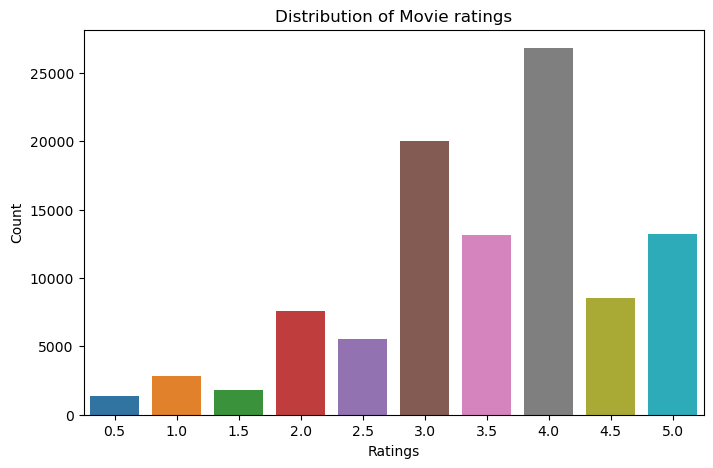

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(data=ratings,x="rating")
plt.title("Distribution of Movie ratings")
plt.xlabel("Ratings")
plt.ylabel("Count")
plt.show()

In [7]:
import pandas as pd


movies = pd.read_csv('ml-latest-small/movies.csv')

print("Columns in movies DataFrame:", movies.columns)

print("\nSample of the movies DataFrame:")
print(movies.head())

if 'genres' in movies.columns:
    movies['genres'] = movies['genres'].astype(str).fillna('')

    movies['genres'] = movies['genres'].str.split('|')

    movies_genres = movies.copy()
    movies_genres = movies_genres.drop(columns=['title'])
    movies_genres = movies_genres.join(movies['genres'].str.join('|').str.get_dummies())

    if 'Toy Story (1995)' in movies['title'].values:
        toy_story_genres = movies_genres[movies['title'] == 'Toy Story (1995)']
        print("\nGenres for 'Toy Story (1995)':")
        print(toy_story_genres)
    else:
        print("Movie 'Toy Story (1995)' not found in the dataset.")
else:
    print("Error: Required columns not found in the movies DataFrame.")


Columns in movies DataFrame: Index(['movieId', 'title', 'genres'], dtype='object')

Sample of the movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Genres for 'Toy Story (1995)':
   movieId                                             genres  \
0        1  [Adventure, Animation, Children, Comedy, Fantasy]   

   (no genres listed)  Action  Adventure  Animation  Children  Comedy  Crime  \
0                   0       0          1      

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

cosine_sim = cosine_similarity(movies_genres.drop(columns = ['movieId', 'genres']), dense_output=False)

cosine_sim_df = pd.DataFrame(cosine_sim, index=movies['title'], columns=movies['title'])

print(cosine_sim_df.head)

<bound method NDFrame.head of title                                      Toy Story (1995)  Jumanji (1995)  \
title                                                                         
Toy Story (1995)                                   1.000000        0.774597   
Jumanji (1995)                                     0.774597        1.000000   
Grumpier Old Men (1995)                            0.316228        0.000000   
Waiting to Exhale (1995)                           0.258199        0.000000   
Father of the Bride Part II (1995)                 0.447214        0.000000   
...                                                     ...             ...   
Black Butler: Book of the Atlantic (2017)          0.670820        0.288675   
No Game No Life: Zero (2017)                       0.774597        0.333333   
Flint (2017)                                       0.000000        0.000000   
Bungo Stray Dogs: Dead Apple (2018)                0.316228        0.000000   
Andrew Dice Clay: Dice

In [9]:
def recommend_movies(movie_title, num_recommendations=5):
    if movie_title not in cosine_sim_df.columns:
        print(f"Movie '{movie_title}' not found in the dataset.")
        return []
    sim_scores = cosine_sim_df[movie_title]
    similar_movies = sim_scores.sort_values(ascending=False).drop(movie_title)
    return similar_movies.head(num_recommendations)

recommended = recommend_movies('Toy Story (1995)', num_recommendations=5)
print(recommended)

title
Adventures of Rocky and Bullwinkle, The (2000)    1.0
Emperor's New Groove, The (2000)                  1.0
Monsters, Inc. (2001)                             1.0
Tale of Despereaux, The (2008)                    1.0
Wild, The (2006)                                  1.0
Name: Toy Story (1995), dtype: float64


In [10]:
# Create a user-item matrix (rows: users, columns: movies, values: ratings)
user_movie_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Fill NaN values with 0 (indicating no rating)
user_movie_matrix.fillna(0, inplace=True)

# Display a sample of the user-item matrix
print("\nUser-Item Interaction Matrix (Sample):")
print(user_movie_matrix.head())



User-Item Interaction Matrix (Sample):
movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     0.0     4.0     0.0     0.0     4.0     0.0     0.0   
2           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
5           4.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
2           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
3           0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
4           0.0     0.0  ...     0

In [11]:
# Calculate Cosine Similarity between users
user_similarity = cosine_similarity(user_movie_matrix)

# Convert to DataFrame for easy handling
user_similarity_df = pd.DataFrame(user_similarity, index=user_movie_matrix.index, columns=user_movie_matrix.index)

# Display a sample of the user similarity matrix
print("\nUser Similarity Matrix (Sample):")
print(user_similarity_df.head())



User Similarity Matrix (Sample):
userId       1         2         3         4         5         6         7    \
userId                                                                         
1       1.000000  0.027283  0.059720  0.194395  0.129080  0.128152  0.158744   
2       0.027283  1.000000  0.000000  0.003726  0.016614  0.025333  0.027585   
3       0.059720  0.000000  1.000000  0.002251  0.005020  0.003936  0.000000   
4       0.194395  0.003726  0.002251  1.000000  0.128659  0.088491  0.115120   
5       0.129080  0.016614  0.005020  0.128659  1.000000  0.300349  0.108342   

userId       8         9         10   ...       601       602       603  \
userId                                ...                                 
1       0.136968  0.064263  0.016875  ...  0.080554  0.164455  0.221486   
2       0.027257  0.000000  0.067445  ...  0.202671  0.016866  0.011997   
3       0.004941  0.000000  0.000000  ...  0.005048  0.004892  0.024992   
4       0.062969  0.011361  0.

In [12]:
def recommend_movies_for_user(user_id, num_recommendations=5):
    # Check if the user ID exists
    if user_id not in user_similarity_df.index:
        print(f"User ID {user_id} not found.")
        return []

    # Get the top N most similar users
    similar_users = user_similarity_df[user_id].sort_values(ascending=False).index[1:num_recommendations+1]

    # Get the movies liked by similar users and recommend the highest rated ones
    similar_user_ratings = user_movie_matrix.loc[similar_users].mean().sort_values(ascending=False)

    # Return top N recommendations that the user hasn't rated yet
    user_watched_movies = user_movie_matrix.loc[user_id]
    recommendations = similar_user_ratings[user_watched_movies.isna()].head(num_recommendations)
    
    # Merge with movie titles
    return recommendations.index.map(movies.set_index('movieId')['title'])

# Test the user-based collaborative filtering
user_recommendations = recommend_movies_for_user(1, num_recommendations=5)
print("\nTop 5 Movies Recommended for User 1:")
print(user_recommendations)



Top 5 Movies Recommended for User 1:
Int64Index([], dtype='int64', name='movieId')


In [13]:
from sklearn.model_selection import train_test_split

# Load the ratings data
import pandas as pd
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Split the ratings data into train and test sets
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

print(f"Train set size: {len(train_data)}, Test set size: {len(test_data)}")


Train set size: 80668, Test set size: 20168


In [14]:
from sklearn.metrics import mean_squared_error
import numpy as np

def calculate_rmse(predictions, ground_truth):
    predictions = predictions[ground_truth.nonzero()].flatten() 
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return np.sqrt(mean_squared_error(predictions, ground_truth))

# Create a user-item matrix for train and test data
train_matrix = train_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)
test_matrix = test_data.pivot(index='userId', columns='movieId', values='rating').fillna(0)

# Example: Using a baseline model (mean rating prediction)
mean_rating = train_matrix.values.mean()
test_matrix_pred = np.full(test_matrix.shape, mean_rating)

# Calculate RMSE
rmse_score = calculate_rmse(test_matrix_pred, test_matrix.values)
print(f"Baseline RMSE: {rmse_score:.4f}")


Baseline RMSE: 3.6020


In [15]:
from sklearn.metrics import mean_absolute_error

def calculate_mae(predictions, ground_truth):
    predictions = predictions[ground_truth.nonzero()].flatten()
    ground_truth = ground_truth[ground_truth.nonzero()].flatten()
    return mean_absolute_error(predictions, ground_truth)

mae_score = calculate_mae(test_matrix_pred, test_matrix.values)
print(f"Baseline MAE: {mae_score:.4f}")


Baseline MAE: 3.4459


In [19]:
pip install streamlit

                                              0.0/8.6 MB ? eta -:--:--
                                              0.2/8.6 MB 3.6 MB/s eta 0:00:03
     --                                       0.4/8.6 MB 5.5 MB/s eta 0:00:02
     ---                                      0.9/8.6 MB 5.4 MB/s eta 0:00:02
     ------                                   1.5/8.6 MB 6.2 MB/s eta 0:00:02
     --------                                 1.8/8.6 MB 6.2 MB/s eta 0:00:02
     ---------                                2.1/8.6 MB 6.2 MB/s eta 0:00:02
     -----------                              2.5/8.6 MB 6.5 MB/s eta 0:00:01
     ------------                             2.8/8.6 MB 6.2 MB/s eta 0:00:01
     --------------                           3.1/8.6 MB 6.2 MB/s eta 0:00:01
     ---------------                          3.3/8.6 MB 6.2 MB/s eta 0:00:01
     ----------------                         3.6/8.6 MB 6.2 MB/s eta 0:00:01
     -----------------                        3.9/8.6 MB 6.3 MB/s eta 0

In [1]:
import streamlit as st

st.title("Movie Recommendation System")
movie_input = st.text_input("Enter a movie title:", "Toy Story (1995)")
if st.button("Recommend"):
    recommended_movies = recommend_movies(movie_input, num_recommendations=5)
    st.write(f"Top 5 Movies similar to '{movie_input}':")
    for movie in recommended_movies.index:
        st.write(f"- {movie}")


2024-11-16 23:54:41.240 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 23:54:41.932 
  command:

    streamlit run C:\Users\Admin\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-11-16 23:54:41.933 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 23:54:41.934 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 23:54:41.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 23:54:41.935 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 23:54:41.937 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-16 23:54:41.938 Session state does not 